In [2]:
import pandas as pd
from haversine import haversine
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('properties_cleaned.csv')

In [4]:
df.head()

,listing_id,suburb,sold_date,sold_type,property_type,is_rural,price,beds,baths,parking,land_size,address_lat,address_lng,address_street,rn
0,2004017953,cremorne-nsw-2090,31 Oct 2010,auction,House,NaN,1250000,3.0,15.0,2.0,NaN,-33.820877,151.231964,88 Macpherson St,1
1,2004113258,killara-nsw-2071,22 Oct 2003,private treaty,House,NaN,1445000,4.0,2.0,2.0,NaN,NaN,NaN,16 Coronga Crescent,1
2,2004188963,burwood-vic-3125,04 May 2005,private treaty,House,NaN,420000,5.0,2.0,2.0,NaN,-37.844440,145.120941,153 Station Street,1
3,2004233042,waverton-nsw-2060,20 Mar 2010,auction,ApartmentUnitFlat,NaN,731500,2.0,2.0,1.0,NaN,-33.835632,151.196800,313/40 King Street,1
4,2004234169,mascot-nsw-2020,17 Mar 2011,private treaty,ApartmentUnitFlat,NaN,445000,1.0,1.0,1.0,NaN,-33.920704,151.189316,42/635 Gardeners Road,1


In [5]:
df = df.dropna(subset=['address_lat','address_lng'])

In [6]:
df.head()

,listing_id,suburb,sold_date,sold_type,property_type,is_rural,price,beds,baths,parking,land_size,address_lat,address_lng,address_street,rn
0,2004017953,cremorne-nsw-2090,31 Oct 2010,auction,House,NaN,1250000,3.0,15.0,2.0,NaN,-33.820877,151.231964,88 Macpherson St,1
2,2004188963,burwood-vic-3125,04 May 2005,private treaty,House,NaN,420000,5.0,2.0,2.0,NaN,-37.844440,145.120941,153 Station Street,1
3,2004233042,waverton-nsw-2060,20 Mar 2010,auction,ApartmentUnitFlat,NaN,731500,2.0,2.0,1.0,NaN,-33.835632,151.196800,313/40 King Street,1
4,2004234169,mascot-nsw-2020,17 Mar 2011,private treaty,ApartmentUnitFlat,NaN,445000,1.0,1.0,1.0,NaN,-33.920704,151.189316,42/635 Gardeners Road,1
5,2004243364,sydney-nsw-2000,14 Jul 2010,private treaty,ApartmentUnitFlat,NaN,368000,NaN,1.0,NaN,NaN,-33.867138,151.207100,"70/361 Kent Street, Trafalgar""""",1


In [7]:
# 加入state
state = []
for i in df['suburb']:
    i = i.split("-")
    state.append(i[-2].upper())

In [8]:
df['state'] = state
df

,listing_id,suburb,sold_date,sold_type,property_type,is_rural,price,beds,baths,parking,land_size,address_lat,address_lng,address_street,rn,state
0,2004017953,cremorne-nsw-2090,31 Oct 2010,auction,House,NaN,1250000,3.0,15.0,2.0,NaN,-33.820877,151.231964,88 Macpherson St,1,NSW
2,2004188963,burwood-vic-3125,04 May 2005,private treaty,House,NaN,420000,5.0,2.0,2.0,NaN,-37.844440,145.120941,153 Station Street,1,VIC
3,2004233042,waverton-nsw-2060,20 Mar 2010,auction,ApartmentUnitFlat,NaN,731500,2.0,2.0,1.0,NaN,-33.835632,151.196800,313/40 King Street,1,NSW
4,2004234169,mascot-nsw-2020,17 Mar 2011,private treaty,ApartmentUnitFlat,NaN,445000,1.0,1.0,1.0,NaN,-33.920704,151.189316,42/635 Gardeners Road,1,NSW
5,2004243364,sydney-nsw-2000,14 Jul 2010,private treaty,ApartmentUnitFlat,NaN,368000,NaN,1.0,NaN,NaN,-33.867138,151.207100,"70/361 Kent Street, Trafalgar""""",1,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862709,2017150311,carina-qld-4152,15 Jul 2021,private treaty,House,NaN,735000,3.0,1.0,1.0,607.0,-27.480347,153.094162,44 Cotswold Street,1,QLD
862710,2017150481,spring-hill-qld-4000,04 Jun 2021,private treaty,ApartmentUnitFlat,NaN,370000,2.0,1.0,1.0,NaN,-27.461271,153.025848,27/336 Boundary Street,1,QLD
862711,2017150716,east-brisbane-qld-4169,21 Jul 2021,private treaty,ApartmentUnitFlat,NaN,2000000,3.0,2.0,3.0,NaN,-27.478432,153.042313,27/10 Park Avenue,1,QLD
862712,2017151605,boronia-heights-qld-4124,22 Jul 2021,private treaty,House,NaN,361000,3.0,1.0,1.0,501.0,-27.690954,153.021912,91 Short Street,1,QLD


In [9]:
data = {}
for record in df.to_dict('records'):
    k = record['suburb']
    data[k] = record
data

{'cremorne-nsw-2090': {'listing_id': 2017148772,
  'suburb': 'cremorne-nsw-2090',
  'sold_date': '16 Jul 2021',
  'sold_type': 'private treaty',
  'property_type': 'ApartmentUnitFlat',
  'is_rural': nan,
  'price': 1600000,
  'beds': 2.0,
  'baths': 2.0,
  'parking': 1.0,
  'land_size': nan,
  'address_lat': -33.8270226,
  'address_lng': 151.220062,
  'address_street': '48/240 Ben Boyd  Road',
  'rn': 1,
  'state': 'NSW'},
 'burwood-vic-3125': {'listing_id': 2017093692,
  'suburb': 'burwood-vic-3125',
  'sold_date': '16 Jul 2021',
  'sold_type': 'auction',
  'property_type': 'ApartmentUnitFlat',
  'is_rural': nan,
  'price': 710000,
  'beds': 2.0,
  'baths': 1.0,
  'parking': 1.0,
  'land_size': nan,
  'address_lat': -37.8439941,
  'address_lng': 145.103561,
  'address_street': '3/84-86 Roslyn Street',
  'rn': 1,
  'state': 'VIC'},
 'waverton-nsw-2060': {'listing_id': 2017123927,
  'suburb': 'waverton-nsw-2060',
  'sold_date': '05 Jul 2021',
  'sold_type': 'private treaty',
  'property

In [10]:
def get_cor(suburb: dict)->tuple:
    record = data[suburb]
    return(record['address_lat'], record['address_lng'])

In [11]:
cbd = {
        'NSW':get_cor('sydney-nsw-2000'),
        'VIC':get_cor('melbourne-vic-3000'),
        'QLD':get_cor('brisbane-city-qld-4000'),
    }

In [12]:
def get_state(suburb: dict)->str:
    record = data[suburb]
    return record['state']

def get_distance_to_cbd(suburb:str)->float:
    cor = get_cor(suburb)
    state = get_state(suburb)
    return haversine(cor, cbd[state])

In [13]:
distance_to_cbd = []
for i in df['suburb']:
    dis = get_distance_to_cbd(i)
    distance_to_cbd.append(round(dis,2))
df['distance_to_cbd'] = distance_to_cbd

In [14]:
df

,listing_id,suburb,sold_date,sold_type,property_type,is_rural,price,beds,baths,parking,land_size,address_lat,address_lng,address_street,rn,state,distance_to_cbd
0,2004017953,cremorne-nsw-2090,31 Oct 2010,auction,House,NaN,1250000,3.0,15.0,2.0,NaN,-33.820877,151.231964,88 Macpherson St,1,NSW,4.21
2,2004188963,burwood-vic-3125,04 May 2005,private treaty,House,NaN,420000,5.0,2.0,2.0,NaN,-37.844440,145.120941,153 Station Street,1,VIC,12.38
3,2004233042,waverton-nsw-2060,20 Mar 2010,auction,ApartmentUnitFlat,NaN,731500,2.0,2.0,1.0,NaN,-33.835632,151.196800,313/40 King Street,1,NSW,3.02
4,2004234169,mascot-nsw-2020,17 Mar 2011,private treaty,ApartmentUnitFlat,NaN,445000,1.0,1.0,1.0,NaN,-33.920704,151.189316,42/635 Gardeners Road,1,NSW,6.91
5,2004243364,sydney-nsw-2000,14 Jul 2010,private treaty,ApartmentUnitFlat,NaN,368000,NaN,1.0,NaN,NaN,-33.867138,151.207100,"70/361 Kent Street, Trafalgar""""",1,NSW,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862709,2017150311,carina-qld-4152,15 Jul 2021,private treaty,House,NaN,735000,3.0,1.0,1.0,607.0,-27.480347,153.094162,44 Cotswold Street,1,QLD,6.20
862710,2017150481,spring-hill-qld-4000,04 Jun 2021,private treaty,ApartmentUnitFlat,NaN,370000,2.0,1.0,1.0,NaN,-27.461271,153.025848,27/336 Boundary Street,1,QLD,0.88
862711,2017150716,east-brisbane-qld-4169,21 Jul 2021,private treaty,ApartmentUnitFlat,NaN,2000000,3.0,2.0,3.0,NaN,-27.478432,153.042313,27/10 Park Avenue,1,QLD,1.96
862712,2017151605,boronia-heights-qld-4124,22 Jul 2021,private treaty,House,NaN,361000,3.0,1.0,1.0,501.0,-27.690954,153.021912,91 Short Street,1,QLD,25.47


In [52]:
df.to_csv('properties_cleaned_with_dis_to_cbd')

In [15]:
df_suburb = pd.read_csv('suburb_dist_cbd_filtered.csv')

In [16]:
df_suburb

,suburb,distance_to_cbd
0,abbotsbury-nsw-2176,31.61
1,abbotsford-nsw-2046,6.49
2,abbotsford-vic-3067,3.85
3,aberfeldie-vic-3040,8.23
4,acacia-ridge-qld-4110,14.24
...,...,...
965,yellingbo-vic-3139,47.45
966,yennora-nsw-2161,21.60
967,yeronga-qld-4104,6.24
968,zetland-nsw-2017,4.63


Text(0.5, 1.0, 'histogram of distance to cbd')

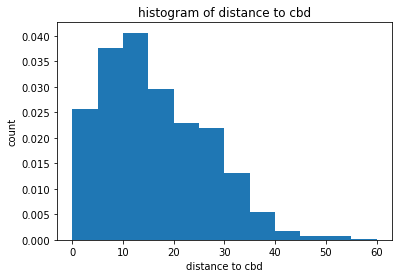

In [17]:
bin_list = [0,5,10,15,20,25,30,35,40,45,50,55,60]
plt.hist(df_suburb['distance_to_cbd'], bins = bin_list, density = True)
plt.xlabel('distance to cbd')
plt.ylabel('count')
plt.title('histogram of distance to cbd')

Text(0.5, 0, 'distance to cbd')

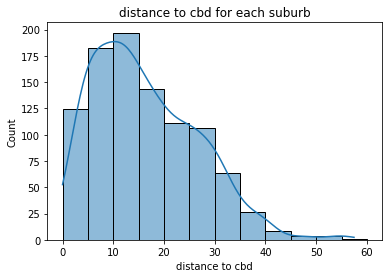

In [19]:
# count of suburbs
ax = sns.histplot(df_suburb['distance_to_cbd'], bins = bin_list, kde=True)
ax.set_title("distance to cbd for each suburb")
ax.set_xlabel('distance to cbd')